<a href="https://colab.research.google.com/github/A5inity/40-Day-Task-Challenge-DS-24-/blob/main/Task_2_Algorithim_Speed_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
# First part of this code was taken from the Task1 : Cancer Prediction File

In [280]:
#Help taken from these sources : https://www.youtube.com/watch?v=My4JgIeFdWk           https://www.kaggle.com/code/edwincaleb/eda-breast-cancer-classification
import numpy as np
import seaborn as sns
import pandas as pd
# Training libraries
from sklearn.model_selection import train_test_split # Splitting the test and train data
from sklearn.linear_model import LogisticRegression # Our Model.
from sklearn.preprocessing import StandardScaler #Value Normalisation
from sklearn.metrics import classification_report # For printing out the Final Model Report
from sklearn.metrics import accuracy_score #Performance metrics

In [281]:
data = !gdown --id 1UsrJ2uuLzsVMBMrLZYwZB231rCtycHhr
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [282]:
df.drop(['Unnamed: 32', "id"], axis=1, inplace=True) # Dropping that Unnamed column with Null values

In [283]:
df.info() #Check value type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [284]:
df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [285]:
df.diagnosis.value_counts() #Checking the amount of benign and Malignant Cancer Cells

,count
diagnosis,
B,357
M,212


In [286]:
y=df["diagnosis"]
X=df.drop(["diagnosis"], axis= 1)

In [287]:
#!pip install sklearn.preprocessing
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X) #Normalisation

In [288]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
LR=LogisticRegression(solver='liblinear')
LR.fit(X_train1, y_train1)
predictions = LR.predict(X_test1)

start_time = time.time()
LR.fit(X_train1, y_train1)
training_time1 = time.time() - start_time
start_time = time.time()


predictions = LR.predict(X_test1)
prediction_time1 = time.time() - start_time
# Print the time taken
print(f"Training time: {training_time1:.4f} seconds")
print(f"Prediction time: {prediction_time1:.4f} seconds")


Training time: 0.0058 seconds
Prediction time: 0.0005 seconds


In [289]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train2, y_train2)
predictions = model.predict(X_test2)

start_time = time.time()
model.fit(X_train2, y_train2)
training_time2 = time.time() - start_time
start_time = time.time()


predictions = model.predict(X_test2)
prediction_time2 = time.time() - start_time
# Print the time taken
print(f"Training time: {training_time2:.4f} seconds")
print(f"Prediction time: {prediction_time2:.4f} seconds")

Training time: 0.0017 seconds
Prediction time: 0.0030 seconds


In [290]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train3, y_train3)
predictions = model.predict(X_test3)
start_time = time.time()
model.fit(X_train3, y_train3)
training_time3 = time.time() - start_time
start_time = time.time()


predictions = model.predict(X_test3)
prediction_time3 = time.time() - start_time
# Print the time taken
print(f"Training time: {training_time3:.4f} seconds")
print(f"Prediction time: {prediction_time3:.4f} seconds")



Training time: 0.0151 seconds
Prediction time: 0.0008 seconds


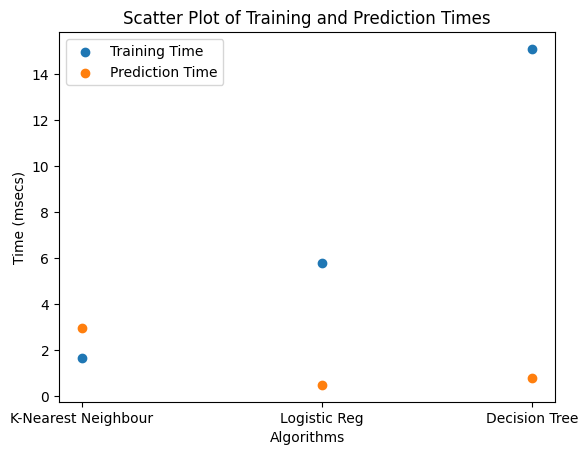

In [291]:
# Algorithm names as categorical labels
x_labels = np.array([ 'K-Nearest Neighbour','Logistic Reg', 'Decision Tree'])  # Logistic Regression, k-NN, Decision Tree


x = np.array([1.7, 2.5, 3.2])
y = np.array([training_time2, training_time1, training_time3])  # Training times
y2 = np.array([prediction_time2, prediction_time1, prediction_time3])  # Prediction times



#Multiplying by 1000 to get the units in Milliseconds
plt.scatter(x, y*1000, label='Training Time')
plt.scatter(x, y2*1000, label='Prediction Time')


plt.xticks(x, x_labels)
plt.xlabel('Algorithms')
plt.ylabel('Time (msecs)')
plt.title('Scatter Plot of Training and Prediction Times')
plt.legend()

plt.show()

#Conclusion :

### KNN seems to have the lowest variance between training and prediction time while Logistic Regression is a good middle ground since the traning time isnt too high and the prediciton time is lower than the Decision Tree algorithim. Logistric Regression is the most efficient model out of the 3 Algorithims test